In [14]:
import nltk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [15]:
import pandas as pd
data=pd.read_csv('news_sentiment_analysis.csv')

print(data.columns)
print(data.size)

Index(['Source', 'Author', 'Title', 'Description', 'URL', 'Published At',
       'Sentiment', 'Type'],
      dtype='object')
28000


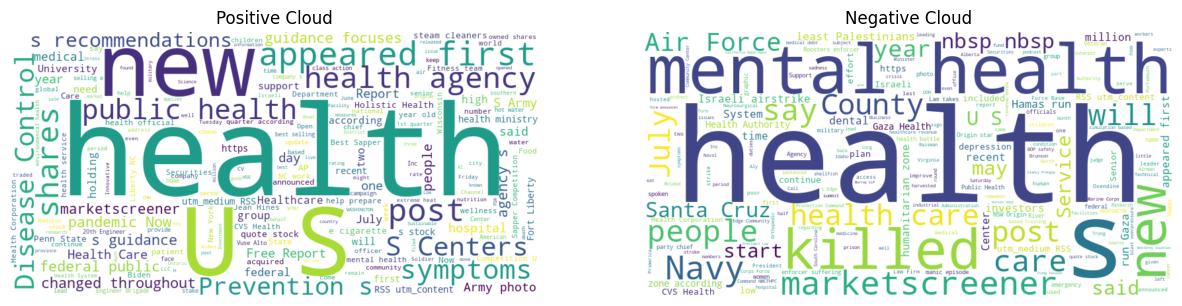

In [16]:
#   Wordcloud to show description used to describe positive and negative sentiment with news type as health

positive=data[(data['Sentiment']=='positive') & (data['Type']=='Health')]
negative=data[(data['Sentiment']=='negative') & (data['Type']=='Health')]

positive_text = " ".join(positive['Description'].astype(str))
negative_text = " ".join(negative['Description'].astype(str))


positive_wordcloud=WordCloud(width=800, height=400, max_words=200, background_color='white').generate(positive_text)
negative_wordcloud=WordCloud(width=800, height=400, max_words=200, background_color='white').generate(negative_text)
plt.figure(figsize=(15, 7.5))

#Positive Wordcloud
plt.subplot(1,2,1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Cloud')
plt.axis("off")


plt.subplot(1,2,2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Cloud')
plt.axis("off")
plt.show()


In [17]:
positive = data[(data['Sentiment'] == 'positive') & (data['Type'] == 'Technology')]
print(positive)

             Source           Author   
615   The Chronicle            peter  \
617        dvidshub     Lori Stewart   
618       4-traders              NaN   
619        betanews    Brian Fagioli   
622          sports          Reuters   
...             ...              ...   
3493   etfdailynews  MarketBeat News   
3495   etfdailynews  MarketBeat News   
3496   etfdailynews  MarketBeat News   
3497   etfdailynews  MarketBeat News   
3499   etfdailynews  MarketBeat News   

                                                  Title   
615   Unleashing green potential: Climate tech can b...  \
617   Operation OVERCAST Created to Recruit German S...   
618   Tech Up Slightly as Traders Digest Thursday Ro...   
619   Ampace Andes 1500 redefines portable power wit...   
622   Exclusive-OpenAI working on new reasoning tech...   
...                                                 ...   
3493  QRG Capital Management Inc. Decreases Stake in...   
3495  Arrow Electronics, Inc. (NYSE:ARW) Shares

In [23]:
#Preprocess the data with samples
sample_size=200
positive_sample=data[data['Sentiment']=='positive'].sample(n=sample_size, random_state=15)
print(len(positive_sample))
negative_sample=data[data['Sentiment']=='negative'].sample(n=sample_size, random_state=15)
print(len(negative_sample))
balanced_sample=pd.concat([positive_sample, negative_sample])
balanced_sample['Sentiment'].value_counts()


200
200


Sentiment
positive    200
negative    200
Name: count, dtype: int64